In [ ]:
# This is the first step. You need to connect to your TAMU email to access the content of the shared drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
from numpy import asarray
import os
import tensorflow as tf
import random
import numpy as np
import pandas as pd
from scipy import interpolate

In [ ]:
 K = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/K.xlsx')
 K1 = K

In [ ]:
# only importing those attributes/nutrients which are used in our analysis
cols = ['Date','Conc of K', 'Ca', 'Mg', 'Na', 'K', 'B', 'CO_3',
       'HCO_3', 'SO_4', 'Cl', 'NO3_N', 'P', 'pH', 'Conductivity',
       'Hardness_grains of CACO_3', 'Hardness_ppm', 'Alkalinity', 'TDS', 'SAR',
       'Fe', 'Zn', 'Cu', 'Mn','CB']
K1 = K1[cols]
K1

,Date,Conc of K,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
0,2022-04-29,200,118,28,12,278,0.32,0,8,105,...,24,408,7,719,0.3,0.005,0.05,0.005,0.70,185
1,2022-05-02,200,117,30,9,229,0.31,0,3,104,...,24,413,3,649,0.2,0.005,0.06,0.005,0.99,184
2,2022-05-06,200,117,30,3,136,0.29,0,0,102,...,24,414,0,512,0.1,0.005,0.04,0.005,1.17,208
3,2022-05-16,200,111,32,3,67,0.38,0,0,155,...,24,409,0,475,0.1,0.005,0.01,0.005,0.15,183
4,2022-05-18,200,119,39,2,171,0.34,0,0,144,...,27,460,0,646,0.0,0.005,0.02,0.005,0.11,178
5,2022-04-29,100,74,23,14,230,0.21,0,6,81,...,16,278,5,572,0.4,0.005,0.05,0.005,0.16,147
6,2022-05-02,100,114,30,10,230,0.31,0,9,105,...,24,409,8,631,0.2,0.005,0.06,0.005,0.25,176
7,2022-05-06,100,111,30,4,163,0.29,0,2,100,...,23,399,2,522,0.1,0.005,0.04,0.005,0.21,178
8,2022-05-16,100,152,30,3,50,0.40,0,8,160,...,29,503,6,489,0.1,0.005,0.01,0.005,0.06,170
9,2022-05-18,100,132,32,2,148,0.30,0,2,121,...,27,464,2,572,0.0,0.005,0.02,0.005,0.13,165


In [ ]:
# As we collected data at irregular intervals and the dataset was small, it was important to interpolate the data for the other dates, that is why, I used a technique called as linear interpolation.
# This technique was carried out for all concentrations of K (200, 100 and 300 ppm), Mg (30, 50 and 70 ppm) and N (100, 175 and 250 ppm) respectively
# For each nutrient concentration (K, Mg and N), we have a separate datafile which we use for analysis (merged_df_K, merged_df_Mg and merged_df_N)
from scipy import interpolate

In [ ]:
K1_interpolated = K1.head(5)

In [ ]:
K1_interpolated

,Date,Conc of K,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
0,2022-04-29,200,118,28,12,278,0.32,0,8,105,...,24,408,7,719,0.3,0.005,0.05,0.005,0.70,185
1,2022-05-02,200,117,30,9,229,0.31,0,3,104,...,24,413,3,649,0.2,0.005,0.06,0.005,0.99,184
2,2022-05-06,200,117,30,3,136,0.29,0,0,102,...,24,414,0,512,0.1,0.005,0.04,0.005,1.17,208
3,2022-05-16,200,111,32,3,67,0.38,0,0,155,...,24,409,0,475,0.1,0.005,0.01,0.005,0.15,183
4,2022-05-18,200,119,39,2,171,0.34,0,0,144,...,27,460,0,646,0.0,0.005,0.02,0.005,0.11,178


In [ ]:
# Convert the date column to a datetime object
K1_interpolated['Date'] = pd.to_datetime(K1_interpolated['Date'])

# Set the date column as the index
K1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
K1_interpolated = K1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
K1_interpolated = K1_interpolated.interpolate(method='linear')

<ipython-input-8-914c8db3fbef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K1_interpolated['Date'] = pd.to_datetime(K1_interpolated['Date'])


In [ ]:
K2 = K[5:10]
K2 = K2[cols]
K2_interpolated = K2
# Convert the date column to a datetime object
K2_interpolated['Date'] = pd.to_datetime(K2_interpolated['Date'])

# Set the date column as the index
K2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
K2_interpolated = K2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
K2_interpolated = K2_interpolated.interpolate(method='linear')
K2_interpolated

,Conc of K,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,100.0,74.000000,23.000000,14.000000,230.00,0.210000,0.0,6.00,81.00,5.000,...,16.000000,278.000000,5.0,572.000000,0.400000,0.005,0.050000,0.005,0.160,147.000000
2022-04-30,100.0,87.333333,25.333333,12.666667,230.00,0.243333,0.0,7.00,89.00,5.000,...,18.666667,321.666667,6.0,591.666667,0.333333,0.005,0.053333,0.005,0.190,156.666667
2022-05-01,100.0,100.666667,27.666667,11.333333,230.00,0.276667,0.0,8.00,97.00,5.000,...,21.333333,365.333333,7.0,611.333333,0.266667,0.005,0.056667,0.005,0.220,166.333333
2022-05-02,100.0,114.000000,30.000000,10.000000,230.00,0.310000,0.0,9.00,105.00,5.000,...,24.000000,409.000000,8.0,631.000000,0.200000,0.005,0.060000,0.005,0.250,176.000000
2022-05-03,100.0,113.250000,30.000000,8.500000,213.25,0.305000,0.0,7.25,103.75,3.925,...,23.750000,406.500000,6.5,603.750000,0.175000,0.005,0.055000,0.005,0.240,176.500000
2022-05-04,100.0,112.500000,30.000000,7.000000,196.50,0.300000,0.0,5.50,102.50,2.850,...,23.500000,404.000000,5.0,576.500000,0.150000,0.005,0.050000,0.005,0.230,177.000000
2022-05-05,100.0,111.750000,30.000000,5.500000,179.75,0.295000,0.0,3.75,101.25,1.775,...,23.250000,401.500000,3.5,549.250000,0.125000,0.005,0.045000,0.005,0.220,177.500000
2022-05-06,100.0,111.000000,30.000000,4.000000,163.00,0.290000,0.0,2.00,100.00,0.700,...,23.000000,399.000000,2.0,522.000000,0.100000,0.005,0.040000,0.005,0.210,178.000000
2022-05-07,100.0,115.100000,30.000000,3.900000,151.70,0.301000,0.0,2.60,106.00,0.700,...,23.600000,409.400000,2.4,518.700000,0.100000,0.005,0.037000,0.005,0.195,177.200000


In [ ]:
K3 = K[10:15]
K3 = K3[cols]
K3_interpolated = K3
# Convert the date column to a datetime object
K3_interpolated['Date'] = pd.to_datetime(K3_interpolated['Date'])

# Set the date column as the index
K3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
K3_interpolated = K3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
K3_interpolated = K3_interpolated.interpolate(method='linear')
K3_interpolated

,Conc of K,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,300.0,72.000000,21.000000,13.000000,301.0,0.240000,0.0,7.0,76.00,5.000,...,16.000000,266.000000,6.000000,699.000000,0.400000,0.005,0.080000,0.005,0.1500,159.000000
2022-04-30,300.0,84.666667,23.333333,11.666667,287.0,0.273333,0.0,54.0,83.00,5.000,...,18.333333,306.666667,44.333333,741.666667,0.333333,0.005,0.093333,0.005,0.1800,156.333333
2022-05-01,300.0,97.333333,25.666667,10.333333,273.0,0.306667,0.0,101.0,90.00,5.000,...,20.666667,347.333333,82.666667,784.333333,0.266667,0.005,0.106667,0.005,0.2100,153.666667
2022-05-02,300.0,110.000000,28.000000,9.000000,259.0,0.340000,0.0,148.0,97.00,5.000,...,23.000000,388.000000,121.000000,827.000000,0.200000,0.005,0.120000,0.005,0.2400,151.000000
2022-05-03,300.0,110.000000,28.000000,7.500000,241.0,0.337500,0.0,111.0,96.75,3.925,...,23.000000,388.250000,90.750000,764.500000,0.175000,0.005,0.107500,0.005,0.2575,167.500000
2022-05-04,300.0,110.000000,28.000000,6.000000,223.0,0.335000,0.0,74.0,96.50,2.850,...,23.000000,388.500000,60.500000,702.000000,0.150000,0.005,0.095000,0.005,0.2750,184.000000
2022-05-05,300.0,110.000000,28.000000,4.500000,205.0,0.332500,0.0,37.0,96.25,1.775,...,23.000000,388.750000,30.250000,639.500000,0.125000,0.005,0.082500,0.005,0.2925,200.500000
2022-05-06,300.0,110.000000,28.000000,3.000000,187.0,0.330000,0.0,0.0,96.00,0.700,...,23.000000,389.000000,0.000000,577.000000,0.100000,0.005,0.070000,0.005,0.3100,217.000000
2022-05-07,300.0,114.300000,28.700000,2.900000,183.5,0.340000,0.0,0.0,102.40,0.700,...,23.800000,403.000000,0.000000,588.700000,0.090000,0.005,0.064000,0.005,0.2870,216.300000


In [ ]:
merged_df_K = pd.concat([K1_interpolated, K2_interpolated, K3_interpolated])
merged_df_K

,Conc of K,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,200.0,118.000000,28.000000,12.000000,278.000000,0.320000,0.0,8.000000,105.000000,5.000,...,24.000000,408.000000,7.000000,719.000000,0.300000,0.005,0.050000,0.005,0.700000,185.000000
2022-04-30,200.0,117.666667,28.666667,11.000000,261.666667,0.316667,0.0,6.333333,104.666667,5.000,...,24.000000,409.666667,5.666667,695.666667,0.266667,0.005,0.053333,0.005,0.796667,184.666667
2022-05-01,200.0,117.333333,29.333333,10.000000,245.333333,0.313333,0.0,4.666667,104.333333,5.000,...,24.000000,411.333333,4.333333,672.333333,0.233333,0.005,0.056667,0.005,0.893333,184.333333
2022-05-02,200.0,117.000000,30.000000,9.000000,229.000000,0.310000,0.0,3.000000,104.000000,5.000,...,24.000000,413.000000,3.000000,649.000000,0.200000,0.005,0.060000,0.005,0.990000,184.000000
2022-05-03,200.0,117.000000,30.000000,7.500000,205.750000,0.305000,0.0,2.250000,103.500000,3.925,...,24.000000,413.250000,2.250000,614.750000,0.175000,0.005,0.055000,0.005,1.035000,190.000000
2022-05-04,200.0,117.000000,30.000000,6.000000,182.500000,0.300000,0.0,1.500000,103.000000,2.850,...,24.000000,413.500000,1.500000,580.500000,0.150000,0.005,0.050000,0.005,1.080000,196.000000
2022-05-05,200.0,117.000000,30.000000,4.500000,159.250000,0.295000,0.0,0.750000,102.500000,1.775,...,24.000000,413.750000,0.750000,546.250000,0.125000,0.005,0.045000,0.005,1.125000,202.000000
2022-05-06,200.0,117.000000,30.000000,3.000000,136.000000,0.290000,0.0,0.000000,102.000000,0.700,...,24.000000,414.000000,0.000000,512.000000,0.100000,0.005,0.040000,0.005,1.170000,208.000000
2022-05-07,200.0,116.400000,30.200000,3.000000,129.100000,0.299000,0.0,0.000000,107.300000,0.730,...,24.000000,413.500000,0.000000,508.300000,0.100000,0.005,0.037000,0.005,1.068000,205.500000


In [ ]:
#merged_df_K = merged_df_K.groupby('Date').mean()
#merged_df_K

In [ ]:
Mg = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/Mg.xlsx')
cols = ['Date','Conc of Mg', 'Ca', 'Mg', 'Na', 'K', 'B', 'CO_3',
       'HCO_3', 'SO_4', 'Cl', 'NO3_N', 'P', 'pH', 'Conductivity',
       'Hardness_grains of CACO_3', 'Hardness_ppm', 'Alkalinity', 'TDS', 'SAR',
       'Fe', 'Zn', 'Cu', 'Mn','CB']
Mg1 = Mg[cols]
Mg1

,Date,Conc of Mg,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
0,2022-04-29,30,74,49,14,181,0.25,0,124,76,...,23,388,102,633,0.3,0.005,0.030,0.005,0.130,126
1,2022-05-02,30,111,66,9,168,0.32,0,123,97,...,32,548,100,671,0.2,0.005,0.030,0.005,0.005,161
2,2022-05-06,30,111,66,3,94,0.31,0,145,95,...,32,549,119,582,0.1,0.005,0.010,0.005,0.005,159
3,2022-05-16,30,138,71,3,26,0.44,0,282,151,...,37,637,231,703,0.0,0.005,0.005,0.005,0.005,139
4,2022-05-18,30,147,87,4,81,0.43,0,231,149,...,42,726,190,782,0.1,0.005,0.040,0.005,0.005,139
5,2022-04-29,50,70,70,14,176,0.32,0,206,76,...,27,463,169,725,0.3,0.005,0.040,0.005,0.160,125
6,2022-05-02,50,111,98,8,144,0.43,0,286,101,...,40,679,234,840,0.1,0.005,0.020,0.005,0.140,144
7,2022-05-06,50,109,98,3,79,0.41,0,322,96,...,39,675,264,756,0.1,0.005,0.010,0.005,0.005,153
8,2022-05-16,50,127,112,3,12,0.52,0,487,131,...,45,780,400,893,0.0,0.005,0.005,0.005,0.005,134
9,2022-05-18,50,161,142,3,58,0.62,0,505,156,...,58,989,414,1087,0.0,0.005,0.020,0.005,0.005,138


In [ ]:
Mg1_interpolated = Mg1.head(5)
# Convert the date column to a datetime object
Mg1_interpolated['Date'] = pd.to_datetime(Mg1_interpolated['Date'])

# Set the date column as the index
Mg1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
Mg1_interpolated = Mg1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
Mg1_interpolated = Mg1_interpolated.interpolate(method='linear')

<ipython-input-14-21937819b7c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mg1_interpolated['Date'] = pd.to_datetime(Mg1_interpolated['Date'])


In [ ]:
Mg2 = Mg[5:10]
Mg2 = Mg2[cols]
Mg2_interpolated = Mg2
# Convert the date column to a datetime object
Mg2_interpolated['Date'] = pd.to_datetime(Mg2_interpolated['Date'])

# Set the date column as the index
Mg2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
Mg2_interpolated = Mg2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
Mg2_interpolated = Mg2_interpolated.interpolate(method='linear')
Mg2_interpolated

,Conc of Mg,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,50.0,70.000000,70.000000,14.00,176.000000,0.320000,0.0,206.000000,76.000000,7.000000,...,27.000000,463.0,169.000000,725.000000,0.300000,0.005,0.040000,0.005,0.160000,125.000000
2022-04-30,50.0,83.666667,79.333333,12.00,165.333333,0.356667,0.0,232.666667,84.333333,6.333333,...,31.333333,535.0,190.666667,763.333333,0.233333,0.005,0.033333,0.005,0.153333,131.333333
2022-05-01,50.0,97.333333,88.666667,10.00,154.666667,0.393333,0.0,259.333333,92.666667,5.666667,...,35.666667,607.0,212.333333,801.666667,0.166667,0.005,0.026667,0.005,0.146667,137.666667
2022-05-02,50.0,111.000000,98.000000,8.00,144.000000,0.430000,0.0,286.000000,101.000000,5.000000,...,40.000000,679.0,234.000000,840.000000,0.100000,0.005,0.020000,0.005,0.140000,144.000000
2022-05-03,50.0,110.500000,98.000000,6.75,127.750000,0.425000,0.0,295.000000,99.750000,3.925000,...,39.750000,678.0,241.500000,819.000000,0.100000,0.005,0.017500,0.005,0.106250,146.250000
2022-05-04,50.0,110.000000,98.000000,5.50,111.500000,0.420000,0.0,304.000000,98.500000,2.850000,...,39.500000,677.0,249.000000,798.000000,0.100000,0.005,0.015000,0.005,0.072500,148.500000
2022-05-05,50.0,109.500000,98.000000,4.25,95.250000,0.415000,0.0,313.000000,97.250000,1.775000,...,39.250000,676.0,256.500000,777.000000,0.100000,0.005,0.012500,0.005,0.038750,150.750000
2022-05-06,50.0,109.000000,98.000000,3.00,79.000000,0.410000,0.0,322.000000,96.000000,0.700000,...,39.000000,675.0,264.000000,756.000000,0.100000,0.005,0.010000,0.005,0.005000,153.000000
2022-05-07,50.0,110.800000,99.400000,3.00,72.300000,0.421000,0.0,338.500000,99.500000,0.700000,...,39.600000,685.5,277.600000,769.700000,0.090000,0.005,0.009500,0.005,0.005000,151.100000


In [ ]:
Mg3 = Mg[10:15]
Mg3 = Mg3[cols]
Mg3_interpolated = Mg3
# Convert the date column to a datetime object
Mg3_interpolated['Date'] = pd.to_datetime(Mg3_interpolated['Date'])

# Set the date column as the index
Mg3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
Mg3_interpolated = Mg3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
Mg3_interpolated = Mg3_interpolated.interpolate(method='linear')
Mg3_interpolated

,Conc of Mg,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,70.0,72.000000,88.000000,13.000000,179.000000,0.2300,0.0,286.000000,75.00,7.000,...,32.00,542.00,234.000000,834.000000,0.200000,0.005,0.0300,0.005,0.150000,121.00
2022-04-30,70.0,89.333333,103.666667,11.333333,175.333333,0.2600,0.0,314.333333,86.00,6.000,...,38.00,650.00,257.333333,891.333333,0.166667,0.005,0.0300,0.005,0.143333,134.00
2022-05-01,70.0,106.666667,119.333333,9.666667,171.666667,0.2900,0.0,342.666667,97.00,5.000,...,44.00,758.00,280.666667,948.666667,0.133333,0.005,0.0300,0.005,0.136667,147.00
2022-05-02,70.0,124.000000,135.000000,8.000000,168.000000,0.3200,0.0,371.000000,108.00,4.000,...,50.00,866.00,304.000000,1006.000000,0.100000,0.005,0.0300,0.005,0.130000,160.00
2022-05-03,70.0,122.500000,134.500000,6.750000,157.750000,0.3175,0.0,391.000000,106.25,3.175,...,49.75,859.75,320.250000,1005.250000,0.075000,0.005,0.0275,0.005,0.098750,156.75
2022-05-04,70.0,121.000000,134.000000,5.500000,147.500000,0.3150,0.0,411.000000,104.50,2.350,...,49.50,853.50,336.500000,1004.500000,0.050000,0.005,0.0250,0.005,0.067500,153.50
2022-05-05,70.0,119.500000,133.500000,4.250000,137.250000,0.3125,0.0,431.000000,102.75,1.525,...,49.25,847.25,352.750000,1003.750000,0.025000,0.005,0.0225,0.005,0.036250,150.25
2022-05-06,70.0,118.000000,133.000000,3.000000,127.000000,0.3100,0.0,451.000000,101.00,0.700,...,49.00,841.00,369.000000,1003.000000,0.000000,0.005,0.0200,0.005,0.005000,147.00
2022-05-07,70.0,119.500000,135.500000,3.000000,116.600000,0.3160,0.2,475.300000,104.10,1.030,...,49.80,855.10,389.400000,1019.500000,0.000000,0.005,0.0185,0.005,0.005000,145.50


In [ ]:
merged_df_Mg = pd.concat([Mg1_interpolated, Mg2_interpolated, Mg3_interpolated])
merged_df_Mg

,Conc of Mg,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,30.0,74.000000,49.000000,14.000000,181.000000,0.250000,0.0,124.000000,76.000000,6.000000,...,23.000000,388.000000,102.000000,633.000000,0.300000,0.005,0.030000,0.005,0.130000,126.000000
2022-04-30,30.0,86.333333,54.666667,12.333333,176.666667,0.273333,0.0,123.666667,83.000000,5.666667,...,26.000000,441.333333,101.333333,645.666667,0.266667,0.005,0.030000,0.005,0.088333,137.666667
2022-05-01,30.0,98.666667,60.333333,10.666667,172.333333,0.296667,0.0,123.333333,90.000000,5.333333,...,29.000000,494.666667,100.666667,658.333333,0.233333,0.005,0.030000,0.005,0.046667,149.333333
2022-05-02,30.0,111.000000,66.000000,9.000000,168.000000,0.320000,0.0,123.000000,97.000000,5.000000,...,32.000000,548.000000,100.000000,671.000000,0.200000,0.005,0.030000,0.005,0.005000,161.000000
2022-05-03,30.0,111.000000,66.000000,7.500000,149.500000,0.317500,0.0,128.500000,96.500000,3.925000,...,32.000000,548.250000,104.750000,648.750000,0.175000,0.005,0.025000,0.005,0.005000,160.500000
2022-05-04,30.0,111.000000,66.000000,6.000000,131.000000,0.315000,0.0,134.000000,96.000000,2.850000,...,32.000000,548.500000,109.500000,626.500000,0.150000,0.005,0.020000,0.005,0.005000,160.000000
2022-05-05,30.0,111.000000,66.000000,4.500000,112.500000,0.312500,0.0,139.500000,95.500000,1.775000,...,32.000000,548.750000,114.250000,604.250000,0.125000,0.005,0.015000,0.005,0.005000,159.500000
2022-05-06,30.0,111.000000,66.000000,3.000000,94.000000,0.310000,0.0,145.000000,95.000000,0.700000,...,32.000000,549.000000,119.000000,582.000000,0.100000,0.005,0.010000,0.005,0.005000,159.000000
2022-05-07,30.0,113.700000,66.500000,3.000000,87.200000,0.323000,0.0,158.700000,100.600000,0.700000,...,32.500000,557.800000,130.200000,594.100000,0.090000,0.005,0.009500,0.005,0.005000,157.000000


In [ ]:
#merged_df_Mg = merged_df_Mg.groupby('Date').mean()
#merged_df_Mg

In [ ]:
N = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/N.xlsx')
cols = ['Date','Conc of N', 'Ca', 'Mg', 'Na', 'K', 'B', 'CO_3',
       'HCO_3', 'SO_4', 'Cl', 'NO3_N', 'P', 'pH', 'Conductivity',
       'Hardness_grains of CACO_3', 'Hardness_ppm', 'Alkalinity', 'TDS', 'SAR',
       'Fe', 'Zn', 'Cu', 'Mn','CB']
N1 = N[cols]
N1

,Date,Conc of N,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
0,2022-04-29,100,74,23,14,179,0.20,0,8,215,...,16,278,6,617,0.4,0.020,0.04,0.005,0.17,101
1,2022-05-02,100,123,31,9,194,0.35,0,8,305,...,25,436,7,777,0.2,0.005,0.06,0.005,0.28,112
2,2022-05-06,100,119,31,3,161,0.31,0,2,299,...,25,425,2,703,0.1,0.005,0.04,0.005,0.26,115
3,2022-05-16,100,161,39,3,77,0.43,0,0,463,...,33,564,0,815,0.1,0.005,0.07,0.080,0.29,96
4,2022-05-18,100,152,40,3,104,0.35,0,0,412,...,32,542,0,803,0.0,0.005,0.02,0.005,0.23,97
5,2022-04-29,175,74,24,14,193,0.18,0,7,335,...,17,284,5,741,0.3,0.005,0.05,0.005,0.17,89
6,2022-05-02,175,123,33,9,195,0.31,0,1,485,...,26,444,1,947,0.2,0.005,0.06,0.005,0.28,90
7,2022-05-06,175,115,32,3,116,0.26,0,0,462,...,24,419,0,792,0.1,0.005,0.03,0.005,0.25,84
8,2022-05-16,175,176,45,4,65,0.46,0,0,805,...,36,623,0,1153,0.1,0.080,0.04,0.005,0.37,70
9,2022-05-18,175,151,38,3,100,0.36,0,0,650,...,31,535,0,1033,0.1,0.120,0.02,0.005,0.20,72


In [ ]:
N1_interpolated = N1.head(5)
# Convert the date column to a datetime object
N1_interpolated['Date'] = pd.to_datetime(N1_interpolated['Date'])

# Set the date column as the index
N1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
N1_interpolated = N1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
N1_interpolated = N1_interpolated.interpolate(method='linear')

<ipython-input-20-72047c9f1159>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N1_interpolated['Date'] = pd.to_datetime(N1_interpolated['Date'])


In [ ]:
N2 = N[5:10]
N2 = N2[cols]
N2_interpolated = N2
# Convert the date column to a datetime object
N2_interpolated['Date'] = pd.to_datetime(N2_interpolated['Date'])

# Set the date column as the index
N2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
N2_interpolated = N2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
N2_interpolated = N2_interpolated.interpolate(method='linear')
N2_interpolated

,Conc of N,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,175.0,74.000000,24.00,14.000000,193.000000,0.180000,0.0,7.00,335.00,5.000,...,17.0,284.000000,5.000000,741.000000,0.300000,0.0050,0.050000,0.005,0.170000,89.000000
2022-04-30,175.0,90.333333,27.00,12.333333,193.666667,0.223333,0.0,5.00,385.00,5.000,...,20.0,337.333333,3.666667,809.666667,0.266667,0.0050,0.053333,0.005,0.206667,89.333333
2022-05-01,175.0,106.666667,30.00,10.666667,194.333333,0.266667,0.0,3.00,435.00,5.000,...,23.0,390.666667,2.333333,878.333333,0.233333,0.0050,0.056667,0.005,0.243333,89.666667
2022-05-02,175.0,123.000000,33.00,9.000000,195.000000,0.310000,0.0,1.00,485.00,5.000,...,26.0,444.000000,1.000000,947.000000,0.200000,0.0050,0.060000,0.005,0.280000,90.000000
2022-05-03,175.0,121.000000,32.75,7.500000,175.250000,0.297500,0.0,0.75,479.25,3.925,...,25.5,437.750000,0.750000,908.250000,0.175000,0.0050,0.052500,0.005,0.272500,88.500000
2022-05-04,175.0,119.000000,32.50,6.000000,155.500000,0.285000,0.0,0.50,473.50,2.850,...,25.0,431.500000,0.500000,869.500000,0.150000,0.0050,0.045000,0.005,0.265000,87.000000
2022-05-05,175.0,117.000000,32.25,4.500000,135.750000,0.272500,0.0,0.25,467.75,1.775,...,24.5,425.250000,0.250000,830.750000,0.125000,0.0050,0.037500,0.005,0.257500,85.500000
2022-05-06,175.0,115.000000,32.00,3.000000,116.000000,0.260000,0.0,0.00,462.00,0.700,...,24.0,419.000000,0.000000,792.000000,0.100000,0.0050,0.030000,0.005,0.250000,84.000000
2022-05-07,175.0,121.100000,33.30,3.100000,110.900000,0.280000,0.0,0.00,496.30,0.700,...,25.2,439.400000,0.000000,828.100000,0.100000,0.0125,0.031000,0.005,0.262000,82.600000


In [ ]:
N3 = N[10:15]
N3 = N3[cols]
N3_interpolated = N3
# Convert the date column to a datetime object
N3_interpolated['Date'] = pd.to_datetime(N3_interpolated['Date'])

# Set the date column as the index
N3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
N3_interpolated = N3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
N3_interpolated = N3_interpolated.interpolate(method='linear')
N3_interpolated

,Conc of N,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,250.0,78.0,26.00,13.00,201.000000,0.220000,0.0,6.000000,456.000000,5.000,...,18.0,301.00,5.0,892.000000,0.300000,0.0050,0.050,0.005,0.190000,73.0
2022-04-30,250.0,94.0,29.00,12.00,202.666667,0.266667,0.0,4.666667,522.666667,5.000,...,21.0,354.00,4.0,974.666667,0.266667,0.0050,0.060,0.005,0.226667,74.0
2022-05-01,250.0,110.0,32.00,11.00,204.333333,0.313333,0.0,3.333333,589.333333,5.000,...,24.0,407.00,3.0,1057.333333,0.233333,0.0050,0.070,0.005,0.263333,75.0
2022-05-02,250.0,126.0,35.00,10.00,206.000000,0.360000,0.0,2.000000,656.000000,5.000,...,27.0,460.00,2.0,1140.000000,0.200000,0.0050,0.080,0.005,0.300000,76.0
2022-05-03,250.0,123.5,34.75,8.25,183.500000,0.347500,0.0,1.500000,646.250000,3.925,...,26.5,452.25,1.5,1093.500000,0.175000,0.0050,0.070,0.005,0.292500,74.0
2022-05-04,250.0,121.0,34.50,6.50,161.000000,0.335000,0.0,1.000000,636.500000,2.850,...,26.0,444.50,1.0,1047.000000,0.150000,0.0050,0.060,0.005,0.285000,72.0
2022-05-05,250.0,118.5,34.25,4.75,138.500000,0.322500,0.0,0.500000,626.750000,1.775,...,25.5,436.75,0.5,1000.500000,0.125000,0.0050,0.050,0.005,0.277500,70.0
2022-05-06,250.0,116.0,34.00,3.00,116.000000,0.310000,0.0,0.000000,617.000000,0.700,...,25.0,429.00,0.0,954.000000,0.100000,0.0050,0.040,0.005,0.270000,68.0
2022-05-07,250.0,119.2,34.60,3.00,112.300000,0.316000,0.0,0.000000,639.900000,0.700,...,25.6,439.70,0.0,976.300000,0.100000,0.0125,0.039,0.005,0.277000,67.2


In [ ]:
merged_df_N = pd.concat([N1_interpolated, N2_interpolated, N3_interpolated])
merged_df_N

,Conc of N,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,100.0,74.000000,23.000000,14.000000,179.000000,0.200000,0.0,8.000000,215.000000,0.700000,...,16.0,278.000000,6.000000,617.000000,0.400000,0.0200,0.040000,0.0050,0.170000,101.000000
2022-04-30,100.0,90.333333,25.666667,12.333333,184.000000,0.250000,0.0,8.000000,245.000000,2.133333,...,19.0,330.666667,6.333333,670.333333,0.333333,0.0150,0.046667,0.0050,0.206667,104.666667
2022-05-01,100.0,106.666667,28.333333,10.666667,189.000000,0.300000,0.0,8.000000,275.000000,3.566667,...,22.0,383.333333,6.666667,723.666667,0.266667,0.0100,0.053333,0.0050,0.243333,108.333333
2022-05-02,100.0,123.000000,31.000000,9.000000,194.000000,0.350000,0.0,8.000000,305.000000,5.000000,...,25.0,436.000000,7.000000,777.000000,0.200000,0.0050,0.060000,0.0050,0.280000,112.000000
2022-05-03,100.0,122.000000,31.000000,7.500000,185.750000,0.340000,0.0,6.500000,303.500000,4.500000,...,25.0,433.250000,5.750000,758.500000,0.175000,0.0050,0.055000,0.0050,0.275000,112.750000
2022-05-04,100.0,121.000000,31.000000,6.000000,177.500000,0.330000,0.0,5.000000,302.000000,4.000000,...,25.0,430.500000,4.500000,740.000000,0.150000,0.0050,0.050000,0.0050,0.270000,113.500000
2022-05-05,100.0,120.000000,31.000000,4.500000,169.250000,0.320000,0.0,3.500000,300.500000,3.500000,...,25.0,427.750000,3.250000,721.500000,0.125000,0.0050,0.045000,0.0050,0.265000,114.250000
2022-05-06,100.0,119.000000,31.000000,3.000000,161.000000,0.310000,0.0,2.000000,299.000000,3.000000,...,25.0,425.000000,2.000000,703.000000,0.100000,0.0050,0.040000,0.0050,0.260000,115.000000
2022-05-07,100.0,123.200000,31.800000,3.000000,152.600000,0.322000,0.0,1.800000,315.400000,2.770000,...,25.8,438.900000,1.800000,714.200000,0.100000,0.0050,0.043000,0.0125,0.263000,113.100000


In [ ]:
#merged_df_N = merged_df_N.groupby('Date').mean()
#merged_df_N

In [ ]:
# For each of the dataset constructed, we need to find out the important nutrients for plant growth
# For that, we have used a pipeline of feature selection techniques (chi2 test, liner regression and in the end, ExtraTreesClassifier to find out feature importances)
# But, before proceeding further, I have used a GMM to convert our data to a supervised learning problem (dividing the dataset to a binary approach)
import numpy as np
from sklearn.mixture import GaussianMixture

# load data
X = merged_df_N


# perform GMM clustering
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(X)

# assign cluster labels to each data point
labels = gmm.predict(X)

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
merged_df_N['class'] = labels
X_train = merged_df_N.iloc[:,:-1]
y_train = merged_df_N.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X_train and y_train are the training data and labels respectively
# Select the 10 best features
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(X_train, y_train)

In [ ]:
X_new

array([[1.00000000e+02, 7.40000000e+01, 2.30000000e+01, 1.40000000e+01,
        1.79000000e+02, 8.00000000e+00, 2.15000000e+02, 7.00000000e-01,
        8.49100000e+01, 1.89800000e+01, 1.31900000e+03, 2.78000000e+02,
        6.00000000e+00, 6.17000000e+02, 1.01000000e+02],
       [1.00000000e+02, 9.03333333e+01, 2.56666667e+01, 1.23333333e+01,
        1.84000000e+02, 8.00000000e+00, 2.45000000e+02, 2.13333333e+00,
        8.44966667e+01, 1.85533333e+01, 1.32933333e+03, 3.30666667e+02,
        6.33333333e+00, 6.70333333e+02, 1.04666667e+02],
       [1.00000000e+02, 1.06666667e+02, 2.83333333e+01, 1.06666667e+01,
        1.89000000e+02, 8.00000000e+00, 2.75000000e+02, 3.56666667e+00,
        8.40833333e+01, 1.81266667e+01, 1.33966667e+03, 3.83333333e+02,
        6.66666667e+00, 7.23666667e+02, 1.08333333e+02],
       [1.00000000e+02, 1.23000000e+02, 3.10000000e+01, 9.00000000e+00,
        1.94000000e+02, 8.00000000e+00, 3.05000000e+02, 5.00000000e+00,
        8.36700000e+01, 1.77000000e+0

In [ ]:
cols_to_consider = ['Conc of N','Ca', 'Mg', 'Na', 'K', 'B','HCO_3', 'SO_4', 'Cl','NO3_N', 'P', 'Conductivity', 'Hardness_ppm', 'Alkalinity', 'TDS','CB']
X_train = X_train[cols_to_consider]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X_train and y_train are the training data and labels respectively
# Create a linear regression model
model = LinearRegression()

# Use RFE to select the 10 best features
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)

In [ ]:
X_new

array([[7.40000000e+01, 1.40000000e+01, 1.79000000e+02, 2.00000000e-01,
        8.00000000e+00, 2.15000000e+02, 8.49100000e+01, 1.89800000e+01,
        6.00000000e+00, 6.17000000e+02],
       [9.03333333e+01, 1.23333333e+01, 1.84000000e+02, 2.50000000e-01,
        8.00000000e+00, 2.45000000e+02, 8.44966667e+01, 1.85533333e+01,
        6.33333333e+00, 6.70333333e+02],
       [1.06666667e+02, 1.06666667e+01, 1.89000000e+02, 3.00000000e-01,
        8.00000000e+00, 2.75000000e+02, 8.40833333e+01, 1.81266667e+01,
        6.66666667e+00, 7.23666667e+02],
       [1.23000000e+02, 9.00000000e+00, 1.94000000e+02, 3.50000000e-01,
        8.00000000e+00, 3.05000000e+02, 8.36700000e+01, 1.77000000e+01,
        7.00000000e+00, 7.77000000e+02],
       [1.22000000e+02, 7.50000000e+00, 1.85750000e+02, 3.40000000e-01,
        6.50000000e+00, 3.03500000e+02, 7.94950000e+01, 1.72825000e+01,
        5.75000000e+00, 7.58500000e+02],
       [1.21000000e+02, 6.00000000e+00, 1.77500000e+02, 3.30000000e-01,
   

In [ ]:
cols_to_consider = ['Ca', 'Na', 'K', 'B','HCO_3','SO_4','NO3_N','P', 'Alkalinity','TDS']
X_train = X_train[cols_to_consider]

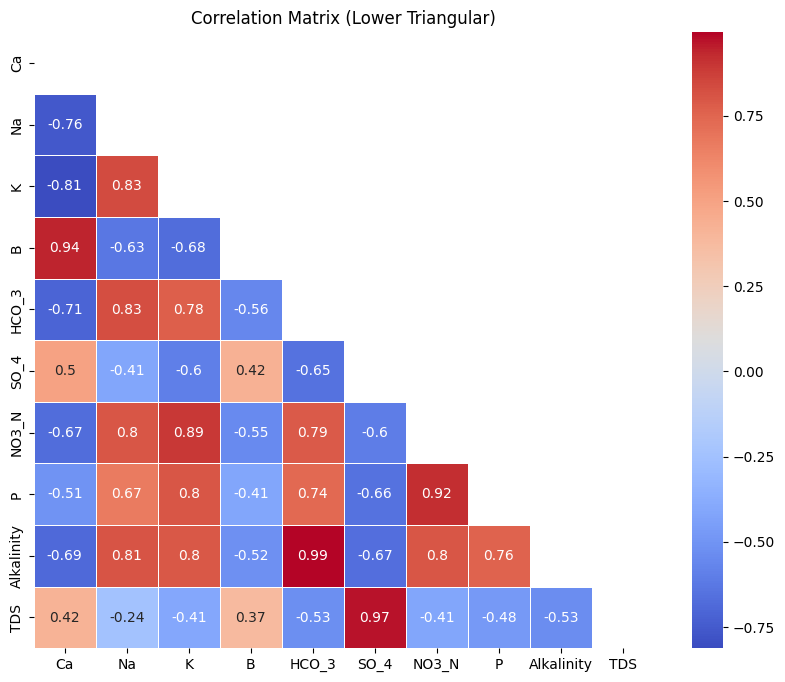

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangular values to NaN
correlation_matrix = correlation_matrix.mask(mask)

# Create the correlation matrix plot using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  # Create the heatmap
plt.title('Correlation Matrix (Lower Triangular)')  # Set the title of the plot
plt.show()  # Show the plot

In [ ]:
# Find pairs with correlation coefficient >= 0.85

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Find pairs with correlation coefficient >= 0.85
pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.9:
            pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the pairs
for pair in pairs:
    print(pair)

('Ca', 'B')
('HCO_3', 'Alkalinity')
('SO_4', 'TDS')
('NO3_N', 'P')


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
X_train = X_train.drop(['B','HCO_3','SO_4','NO3_N'], axis=1)
# Step 1: Preprocess the data
# Assuming you have already prepared your data and split it into X_train and y_train

# Step 2: Split the data (if not done already)
# Assuming you have split your data into training and testing sets: X_train, X_test, y_train, y_test

# Step 3: Train the ExtraTrees model
model = ExtraTreesClassifier()  # or ExtraTreesRegressor() for regression tasks
model.fit(X_train, y_train)

# Step 4: Obtain feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print feature importance ranking
for i, idx in enumerate(indices):
    print(f"{i+1}. Feature '{X_train.columns[idx]}' has importance score: {importances[idx]}")

1. Feature 'TDS' has importance score: 0.4315935892196671
2. Feature 'P' has importance score: 0.20382700265500533
3. Feature 'Alkalinity' has importance score: 0.12555241263245256
4. Feature 'K' has importance score: 0.11350784955670516
5. Feature 'Na' has importance score: 0.06424047380983502
6. Feature 'Ca' has importance score: 0.06127867212633481


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

# load data
X = merged_df_Mg


# perform GMM clustering
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(X)

# assign cluster labels to each data point
labels = gmm.predict(X)

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
merged_df_Mg['class'] = labels
X_train = merged_df_Mg.iloc[:,:-1]
y_train = merged_df_Mg.iloc[:,-1]

In [ ]:
X_train.columns

Index(['Conc of Mg', 'Ca', 'Mg', 'Na', 'K', 'B', 'CO_3', 'HCO_3', 'SO_4', 'Cl',
       'NO3_N', 'P', 'pH', 'Conductivity', 'Hardness_grains of CACO_3',
       'Hardness_ppm', 'Alkalinity', 'TDS', 'SAR', 'Fe', 'Zn', 'Cu', 'Mn',
       'CB'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X_train and y_train are the training data and labels respectively
# Select the 10 best features
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(X_train, y_train)

In [ ]:
X_new

array([[3.00000000e+01, 7.40000000e+01, 4.90000000e+01, 1.40000000e+01,
        1.81000000e+02, 0.00000000e+00, 1.24000000e+02, 7.60000000e+01,
        6.00000000e+00, 9.15400000e+01, 1.72700000e+01, 2.30000000e+01,
        3.88000000e+02, 1.02000000e+02, 6.33000000e+02],
       [3.00000000e+01, 8.63333333e+01, 5.46666667e+01, 1.23333333e+01,
        1.76666667e+02, 0.00000000e+00, 1.23666667e+02, 8.30000000e+01,
        5.66666667e+00, 8.69533333e+01, 1.63933333e+01, 2.60000000e+01,
        4.41333333e+02, 1.01333333e+02, 6.45666667e+02],
       [3.00000000e+01, 9.86666667e+01, 6.03333333e+01, 1.06666667e+01,
        1.72333333e+02, 0.00000000e+00, 1.23333333e+02, 9.00000000e+01,
        5.33333333e+00, 8.23666667e+01, 1.55166667e+01, 2.90000000e+01,
        4.94666667e+02, 1.00666667e+02, 6.58333333e+02],
       [3.00000000e+01, 1.11000000e+02, 6.60000000e+01, 9.00000000e+00,
        1.68000000e+02, 0.00000000e+00, 1.23000000e+02, 9.70000000e+01,
        5.00000000e+00, 7.77800000e+0

In [ ]:
X_train

,Conc of Mg,Ca,Mg,Na,K,B,CO_3,HCO_3,SO_4,Cl,...,Hardness_grains of CACO_3,Hardness_ppm,Alkalinity,TDS,SAR,Fe,Zn,Cu,Mn,CB
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,30.0,74.000000,49.000000,14.000000,181.000000,0.250000,0.0,124.000000,76.000000,6.000000,...,23.000000,388.000000,102.000000,633.000000,0.300000,0.005,0.030000,0.005,0.130000,126.000000
2022-04-30,30.0,86.333333,54.666667,12.333333,176.666667,0.273333,0.0,123.666667,83.000000,5.666667,...,26.000000,441.333333,101.333333,645.666667,0.266667,0.005,0.030000,0.005,0.088333,137.666667
2022-05-01,30.0,98.666667,60.333333,10.666667,172.333333,0.296667,0.0,123.333333,90.000000,5.333333,...,29.000000,494.666667,100.666667,658.333333,0.233333,0.005,0.030000,0.005,0.046667,149.333333
2022-05-02,30.0,111.000000,66.000000,9.000000,168.000000,0.320000,0.0,123.000000,97.000000,5.000000,...,32.000000,548.000000,100.000000,671.000000,0.200000,0.005,0.030000,0.005,0.005000,161.000000
2022-05-03,30.0,111.000000,66.000000,7.500000,149.500000,0.317500,0.0,128.500000,96.500000,3.925000,...,32.000000,548.250000,104.750000,648.750000,0.175000,0.005,0.025000,0.005,0.005000,160.500000
2022-05-04,30.0,111.000000,66.000000,6.000000,131.000000,0.315000,0.0,134.000000,96.000000,2.850000,...,32.000000,548.500000,109.500000,626.500000,0.150000,0.005,0.020000,0.005,0.005000,160.000000
2022-05-05,30.0,111.000000,66.000000,4.500000,112.500000,0.312500,0.0,139.500000,95.500000,1.775000,...,32.000000,548.750000,114.250000,604.250000,0.125000,0.005,0.015000,0.005,0.005000,159.500000
2022-05-06,30.0,111.000000,66.000000,3.000000,94.000000,0.310000,0.0,145.000000,95.000000,0.700000,...,32.000000,549.000000,119.000000,582.000000,0.100000,0.005,0.010000,0.005,0.005000,159.000000
2022-05-07,30.0,113.700000,66.500000,3.000000,87.200000,0.323000,0.0,158.700000,100.600000,0.700000,...,32.500000,557.800000,130.200000,594.100000,0.090000,0.005,0.009500,0.005,0.005000,157.000000


In [ ]:
cols_to_consider = ['Conc of Mg','Ca', 'Mg', 'Na', 'K','CO_3', 'SO_4', 'HCO_3','Cl', 'NO3_N', 'P','Hardness_grains of CACO_3', 'Hardness_ppm', 'Alkalinity', 'TDS']
X_train = X_train[cols_to_consider]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X_train and y_train are the training data and labels respectively
# Create a linear regression model
model = LinearRegression()

# Use RFE to select the 10 best features
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)

In [ ]:
X_new

array([[4.90000000e+01, 1.40000000e+01, 0.00000000e+00, 1.24000000e+02,
        6.00000000e+00, 9.15400000e+01, 2.30000000e+01, 3.88000000e+02,
        1.02000000e+02, 6.33000000e+02],
       [5.46666667e+01, 1.23333333e+01, 0.00000000e+00, 1.23666667e+02,
        5.66666667e+00, 8.69533333e+01, 2.60000000e+01, 4.41333333e+02,
        1.01333333e+02, 6.45666667e+02],
       [6.03333333e+01, 1.06666667e+01, 0.00000000e+00, 1.23333333e+02,
        5.33333333e+00, 8.23666667e+01, 2.90000000e+01, 4.94666667e+02,
        1.00666667e+02, 6.58333333e+02],
       [6.60000000e+01, 9.00000000e+00, 0.00000000e+00, 1.23000000e+02,
        5.00000000e+00, 7.77800000e+01, 3.20000000e+01, 5.48000000e+02,
        1.00000000e+02, 6.71000000e+02],
       [6.60000000e+01, 7.50000000e+00, 0.00000000e+00, 1.28500000e+02,
        3.92500000e+00, 7.27375000e+01, 3.20000000e+01, 5.48250000e+02,
        1.04750000e+02, 6.48750000e+02],
       [6.60000000e+01, 6.00000000e+00, 0.00000000e+00, 1.34000000e+02,
   

In [ ]:
cols_to_consider = ['Mg', 'Na', 'CO_3','HCO_3', 'Cl','NO3_N','Hardness_grains of CACO_3', 'Hardness_ppm', 'Alkalinity', 'TDS']
X_train = X_train[cols_to_consider]

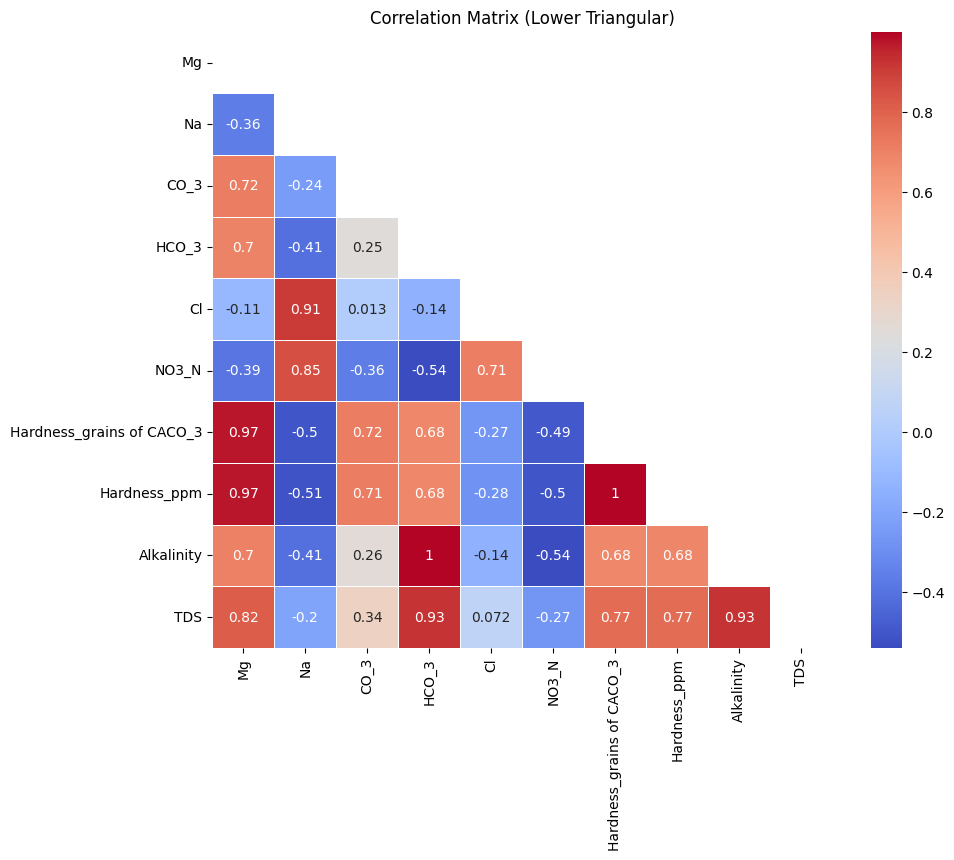

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangular values to NaN
correlation_matrix = correlation_matrix.mask(mask)

# Create the correlation matrix plot using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  # Create the heatmap
plt.title('Correlation Matrix (Lower Triangular)')  # Set the title of the plot
plt.show()  # Show the plot

In [ ]:
# Find pairs with correlation coefficient >= 0.85

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Find pairs with correlation coefficient >= 0.85
pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.9:
            pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the pairs
for pair in pairs:
    print(pair)

('Mg', 'Hardness_grains of CACO_3')
('Mg', 'Hardness_ppm')
('Na', 'Cl')
('HCO_3', 'Alkalinity')
('HCO_3', 'TDS')
('Hardness_grains of CACO_3', 'Hardness_ppm')
('Alkalinity', 'TDS')


In [ ]:
X_train = X_train.drop(['Mg','Hardness_grains of CACO_3','Cl','HCO_3','Alkalinity'], axis=1)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Step 1: Preprocess the data
# Assuming you have already prepared your data and split it into X_train and y_train

# Step 2: Split the data (if not done already)
# Assuming you have split your data into training and testing sets: X_train, X_test, y_train, y_test

# Step 3: Train the ExtraTrees model
model = ExtraTreesClassifier()  # or ExtraTreesRegressor() for regression tasks
model.fit(X_train, y_train)

# Step 4: Obtain feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print feature importance ranking
for i, idx in enumerate(indices):
    print(f"{i+1}. Feature '{X_train.columns[idx]}' has importance score: {importances[idx]}")

1. Feature 'TDS' has importance score: 0.4405123824327977
2. Feature 'Hardness_ppm' has importance score: 0.3028749209791899
3. Feature 'NO3_N' has importance score: 0.13257133430788987
4. Feature 'Na' has importance score: 0.10539906209685503
5. Feature 'CO_3' has importance score: 0.018642300183267548


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

# load data
X = merged_df_K


# perform GMM clustering
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(X)

# assign cluster labels to each data point
labels = gmm.predict(X)

labels

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
merged_df_K['class'] = labels
X_train = merged_df_K.iloc[:,:-1]
y_train = merged_df_K.iloc[:,-1]

In [ ]:
X_train.values

array([[2.00000000e+02, 1.18000000e+02, 2.80000000e+01, ...,
        5.00000000e-03, 7.00000000e-01, 1.85000000e+02],
       [2.00000000e+02, 1.17666667e+02, 2.86666667e+01, ...,
        5.00000000e-03, 7.96666667e-01, 1.84666667e+02],
       [2.00000000e+02, 1.17333333e+02, 2.93333333e+01, ...,
        5.00000000e-03, 8.93333333e-01, 1.84333333e+02],
       ...,
       [3.00000000e+02, 1.53000000e+02, 3.50000000e+01, ...,
        5.00000000e-03, 8.00000000e-02, 2.10000000e+02],
       [3.00000000e+02, 1.58000000e+02, 3.70000000e+01, ...,
        5.00000000e-03, 8.50000000e-02, 2.10500000e+02],
       [3.00000000e+02, 1.63000000e+02, 3.90000000e+01, ...,
        5.00000000e-03, 9.00000000e-02, 2.11000000e+02]])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X_train and y_train are the training data and labels respectively
# Select the 10 best features
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(X_train, y_train)

In [ ]:
X_new

array([[2.00000000e+02, 1.18000000e+02, 1.20000000e+01, 2.78000000e+02,
        8.00000000e+00, 1.05000000e+02, 5.00000000e+00, 8.46400000e+01,
        7.94500000e+01, 1.12300000e+03, 4.08000000e+02, 7.00000000e+00,
        7.19000000e+02, 7.00000000e-01, 1.85000000e+02],
       [2.00000000e+02, 1.17666667e+02, 1.10000000e+01, 2.61666667e+02,
        6.33333333e+00, 1.04666667e+02, 5.00000000e+00, 8.21533333e+01,
        7.81200000e+01, 1.10800000e+03, 4.09666667e+02, 5.66666667e+00,
        6.95666667e+02, 7.96666667e-01, 1.84666667e+02],
       [2.00000000e+02, 1.17333333e+02, 1.00000000e+01, 2.45333333e+02,
        4.66666667e+00, 1.04333333e+02, 5.00000000e+00, 7.96666667e+01,
        7.67900000e+01, 1.09300000e+03, 4.11333333e+02, 4.33333333e+00,
        6.72333333e+02, 8.93333333e-01, 1.84333333e+02],
       [2.00000000e+02, 1.17000000e+02, 9.00000000e+00, 2.29000000e+02,
        3.00000000e+00, 1.04000000e+02, 5.00000000e+00, 7.71800000e+01,
        7.54600000e+01, 1.07800000e+0

In [ ]:
cols_to_consider = ['Conc of K','Ca','Na', 'K', 'HCO_3', 'SO_4', 'Cl', 'NO3_N', 'P', 'Conductivity', 'Hardness_ppm', 'Alkalinity', 'TDS','Mn','CB']
X_train = X_train[cols_to_consider]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X_train and y_train are the training data and labels respectively
# Create a linear regression model
model = LinearRegression()

# Use RFE to select the 10 best features
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)

In [ ]:
X_new

array([[1.18000000e+02, 1.20000000e+01, 2.78000000e+02, 8.00000000e+00,
        1.05000000e+02, 8.46400000e+01, 7.94500000e+01, 7.00000000e+00,
        7.19000000e+02, 7.00000000e-01],
       [1.17666667e+02, 1.10000000e+01, 2.61666667e+02, 6.33333333e+00,
        1.04666667e+02, 8.21533333e+01, 7.81200000e+01, 5.66666667e+00,
        6.95666667e+02, 7.96666667e-01],
       [1.17333333e+02, 1.00000000e+01, 2.45333333e+02, 4.66666667e+00,
        1.04333333e+02, 7.96666667e+01, 7.67900000e+01, 4.33333333e+00,
        6.72333333e+02, 8.93333333e-01],
       [1.17000000e+02, 9.00000000e+00, 2.29000000e+02, 3.00000000e+00,
        1.04000000e+02, 7.71800000e+01, 7.54600000e+01, 3.00000000e+00,
        6.49000000e+02, 9.90000000e-01],
       [1.17000000e+02, 7.50000000e+00, 2.05750000e+02, 2.25000000e+00,
        1.03500000e+02, 7.03025000e+01, 7.49225000e+01, 2.25000000e+00,
        6.14750000e+02, 1.03500000e+00],
       [1.17000000e+02, 6.00000000e+00, 1.82500000e+02, 1.50000000e+00,
   

In [ ]:
cols_to_consider = ['Ca', 'Na', 'K', 'HCO_3', 'SO_4', 'Cl','NO3_N','P','Alkalinity', 'TDS', 'Mn']
X_train = X_train[cols_to_consider]

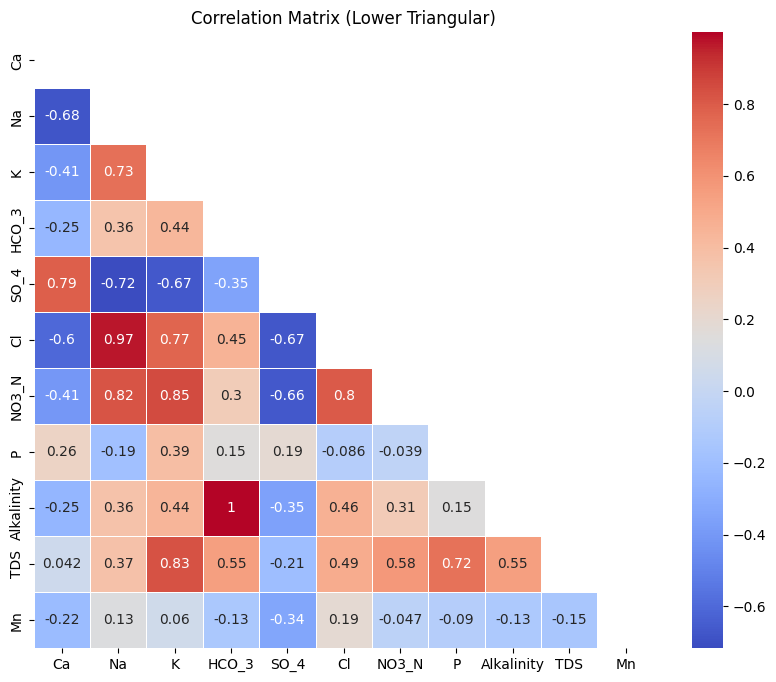

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangular values to NaN
correlation_matrix = correlation_matrix.mask(mask)

# Create the correlation matrix plot using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  # Create the heatmap
plt.title('Correlation Matrix (Lower Triangular)')  # Set the title of the plot
plt.show()  # Show the plot

In [ ]:
# Find pairs with correlation coefficient >= 0.85

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Find pairs with correlation coefficient >= 0.85
pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.9:
            pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the pairs
for pair in pairs:
    print(pair)

('Na', 'Cl')
('HCO_3', 'Alkalinity')


In [ ]:
X_train = X_train.drop(['Cl','HCO_3'], axis=1)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Step 1: Preprocess the data
# Assuming you have already prepared your data and split it into X_train and y_train

# Step 2: Split the data (if not done already)
# Assuming you have split your data into training and testing sets: X_train, X_test, y_train, y_test

# Step 3: Train the ExtraTrees model
model = ExtraTreesClassifier()  # or ExtraTreesRegressor() for regression tasks
model.fit(X_train, y_train)

# Step 4: Obtain feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print feature importance ranking
for i, idx in enumerate(indices):
    print(f"{i+1}. Feature '{X_train.columns[idx]}' has importance score: {importances[idx]}")

1. Feature 'P' has importance score: 0.2580884245341021
2. Feature 'TDS' has importance score: 0.1856682326769365
3. Feature 'K' has importance score: 0.16862220518274287
4. Feature 'Na' has importance score: 0.08891763473182716
5. Feature 'NO3_N' has importance score: 0.07788385636649228
6. Feature 'SO_4' has importance score: 0.0645202501723195
7. Feature 'Mn' has importance score: 0.06148834678100816
8. Feature 'Ca' has importance score: 0.051699335068882746
9. Feature 'Alkalinity' has importance score: 0.04311171448568883


In [ ]:
w = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/water uptake dataset.xlsx')
cols1 = ['Date','H+K (100 ppm)']
w1_interpolated = w[cols1]
w1_interpolated['Conc of K'] = 100
cols2 = ['Date','H+K (200 ppm)']
w2_interpolated = w[cols2]
w2_interpolated['Conc of K'] = 200
cols3 = ['Date','H+K (300 ppm)']
w3_interpolated = w[cols3]
w3_interpolated['Conc of K'] = 300

<ipython-input-63-04842ccb71f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Conc of K'] = 100
<ipython-input-63-04842ccb71f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Conc of K'] = 200
<ipython-input-63-04842ccb71f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
# Convert the date column to a datetime object
w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])

# Set the date column as the index
w1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w1_interpolated = w1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w1_interpolated = w1_interpolated.interpolate(method='linear')

<ipython-input-64-3668bf58d8a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])


In [ ]:
w1_interpolated = w1_interpolated.rename(columns={'H+K (100 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])

# Set the date column as the index
w2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w2_interpolated = w2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w2_interpolated = w2_interpolated.interpolate(method='linear')

<ipython-input-66-51b01a6ef356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])


In [ ]:
w2_interpolated = w2_interpolated.rename(columns={'H+K (200 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])

# Set the date column as the index
w3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w3_interpolated = w3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w3_interpolated = w3_interpolated.interpolate(method='linear')

<ipython-input-68-b8e3e87cb642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])


In [ ]:
w3_interpolated = w3_interpolated.rename(columns={'H+K (300 ppm)':'water uptake'})

In [ ]:
merged_df_water_uptake_K = pd.concat([w1_interpolated, w2_interpolated, w3_interpolated])
merged_df_water_uptake_K

,water uptake,Conc of K
Date,,
2022-05-06,7.350000,100.0
2022-05-07,8.113333,100.0
2022-05-08,8.876667,100.0
2022-05-09,9.640000,100.0
2022-05-10,18.415000,100.0
2022-05-11,27.190000,100.0
2022-05-12,27.763333,100.0
2022-05-13,28.336667,100.0
2022-05-14,28.910000,100.0


In [ ]:
#merged_df_water_uptake_K = merged_df_water_uptake_K.groupby('Date').mean()
#merged_df_water_uptake_K

In [ ]:
w = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/water uptake dataset.xlsx')
cols1 = ['Date','H+Mg (30 ppm)']
w1_interpolated = w[cols1]
w1_interpolated['Conc of Mg'] = 30
cols2 = ['Date','H+Mg (50 ppm)']
w2_interpolated = w[cols2]
w2_interpolated['Conc of Mg'] = 50
cols3 = ['Date','H+Mg (70 ppm)']
w3_interpolated = w[cols3]
w3_interpolated['Conc of Mg'] = 70

<ipython-input-72-118b2fca886c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Conc of Mg'] = 30
<ipython-input-72-118b2fca886c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Conc of Mg'] = 50
<ipython-input-72-118b2fca886c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
# Convert the date column to a datetime object
w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])

# Set the date column as the index
w1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w1_interpolated = w1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w1_interpolated = w1_interpolated.interpolate(method='linear')

<ipython-input-73-3668bf58d8a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])


In [ ]:
w1_interpolated = w1_interpolated.rename(columns={'H+Mg (30 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])

# Set the date column as the index
w2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w2_interpolated = w2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w2_interpolated = w2_interpolated.interpolate(method='linear')

<ipython-input-75-51b01a6ef356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])


In [ ]:
w2_interpolated = w2_interpolated.rename(columns={'H+Mg (50 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])

# Set the date column as the index
w3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w3_interpolated = w3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w3_interpolated = w3_interpolated.interpolate(method='linear')

<ipython-input-77-b8e3e87cb642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])


In [ ]:
w3_interpolated = w3_interpolated.rename(columns={'H+Mg (70 ppm)':'water uptake'})

In [ ]:
merged_df_water_uptake_Mg = pd.concat([w1_interpolated, w2_interpolated, w3_interpolated])
merged_df_water_uptake_Mg

,water uptake,Conc of Mg
Date,,
2022-05-06,10.140000,30.0
2022-05-07,10.853333,30.0
2022-05-08,11.566667,30.0
2022-05-09,12.280000,30.0
2022-05-10,13.750000,30.0
2022-05-11,15.220000,30.0
2022-05-12,20.580000,30.0
2022-05-13,25.940000,30.0
2022-05-14,31.300000,30.0


In [ ]:
#merged_df_water_uptake_Mg = merged_df_water_uptake_Mg.groupby('Date').mean()
#merged_df_water_uptake_Mg

In [ ]:
w = pd.read_excel('/content/drive/Shareddrives/Soybean hydroponics/datasets/water uptake dataset.xlsx')
cols1 = ['Date','H+N (100 ppm)']
w1_interpolated = w[cols1]
w1_interpolated['Conc of N'] = 100
cols2 = ['Date','H+N (175 ppm)']
w2_interpolated = w[cols2]
w2_interpolated['Conc of N'] = 175
cols3 = ['Date','H+N (250 ppm)']
w3_interpolated = w[cols3]
w3_interpolated['Conc of N'] = 250

<ipython-input-81-17ff22019021>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Conc of N'] = 100
<ipython-input-81-17ff22019021>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Conc of N'] = 175
<ipython-input-81-17ff22019021>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
# Convert the date column to a datetime object
w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])

# Set the date column as the index
w1_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w1_interpolated = w1_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w1_interpolated = w1_interpolated.interpolate(method='linear')

<ipython-input-82-3668bf58d8a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1_interpolated['Date'] = pd.to_datetime(w1_interpolated['Date'])


In [ ]:
w1_interpolated = w1_interpolated.rename(columns={'H+N (100 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])

# Set the date column as the index
w2_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w2_interpolated = w2_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w2_interpolated = w2_interpolated.interpolate(method='linear')

<ipython-input-84-51b01a6ef356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2_interpolated['Date'] = pd.to_datetime(w2_interpolated['Date'])


In [ ]:
w2_interpolated = w2_interpolated.rename(columns={'H+N (175 ppm)':'water uptake'})

In [ ]:
# Convert the date column to a datetime object
w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])

# Set the date column as the index
w3_interpolated.set_index('Date', inplace=True)

# Resample the data to daily frequency
w3_interpolated = w3_interpolated.resample('D').asfreq()

# Interpolate missing values using linear interpolation
w3_interpolated = w3_interpolated.interpolate(method='linear')

<ipython-input-86-b8e3e87cb642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w3_interpolated['Date'] = pd.to_datetime(w3_interpolated['Date'])


In [ ]:
w3_interpolated = w3_interpolated.rename(columns={'H+N (250 ppm)':'water uptake'})

In [ ]:
merged_df_water_uptake_N = pd.concat([w1_interpolated, w2_interpolated, w3_interpolated])
merged_df_water_uptake_N

,water uptake,Conc of N
Date,,
2022-05-06,7.580000,100.0
2022-05-07,7.720000,100.0
2022-05-08,7.860000,100.0
2022-05-09,8.000000,100.0
2022-05-10,16.200000,100.0
2022-05-11,24.400000,100.0
2022-05-12,27.066667,100.0
2022-05-13,29.733333,100.0
2022-05-14,32.400000,100.0


In [ ]:
#merged_df_water_uptake_N = merged_df_water_uptake_N.groupby('Date').mean()
#merged_df_water_uptake_N

In [ ]:
merged_df_K = merged_df_K.reset_index()
cols = ['Date','Conc of K','Ca','Na','K','SO_4','NO3_N','P','Alkalinity','TDS','Mn']
merged_df_K = merged_df_K[cols]
filter_date = pd.to_datetime('2022-05-06')
merged_df_K = merged_df_K[merged_df_K['Date'] >= filter_date]
merged_df_K

,Date,Conc of K,Ca,Na,K,SO_4,NO3_N,P,Alkalinity,TDS,Mn
7,2022-05-06,200.0,117.0,3.0,136.0,102.0,49.670,73.310,0.0,512.0,1.170
8,2022-05-07,200.0,116.4,3.0,129.1,107.3,47.779,73.303,0.0,508.3,1.068
9,2022-05-08,200.0,115.8,3.0,122.2,112.6,45.888,73.296,0.0,504.6,0.966
10,2022-05-09,200.0,115.2,3.0,115.3,117.9,43.997,73.289,0.0,500.9,0.864
11,2022-05-10,200.0,114.6,3.0,108.4,123.2,42.106,73.282,0.0,497.2,0.762
12,2022-05-11,200.0,114.0,3.0,101.5,128.5,40.215,73.275,0.0,493.5,0.660
13,2022-05-12,200.0,113.4,3.0,94.6,133.8,38.324,73.268,0.0,489.8,0.558
14,2022-05-13,200.0,112.8,3.0,87.7,139.1,36.433,73.261,0.0,486.1,0.456
15,2022-05-14,200.0,112.2,3.0,80.8,144.4,34.542,73.254,0.0,482.4,0.354
16,2022-05-15,200.0,111.6,3.0,73.9,149.7,32.651,73.247,0.0,478.7,0.252


In [ ]:
merged_df_Mg = merged_df_Mg.reset_index()
cols = ['Date','Conc of Mg','Na','CO_3','HCO_3','NO3_N','Hardness_ppm','TDS']
merged_df_Mg = merged_df_Mg[cols]
filter_date = pd.to_datetime('2022-05-06')
merged_df_Mg = merged_df_Mg[merged_df_Mg['Date'] >= filter_date]
merged_df_Mg

,Date,Conc of Mg,Na,CO_3,HCO_3,NO3_N,Hardness_ppm,TDS
7,2022-05-06,30.0,3.0,0.0,145.0,57.610,549.0,582.0
8,2022-05-07,30.0,3.0,0.0,158.7,54.575,557.8,594.1
9,2022-05-08,30.0,3.0,0.0,172.4,51.540,566.6,606.2
10,2022-05-09,30.0,3.0,0.0,186.1,48.505,575.4,618.3
11,2022-05-10,30.0,3.0,0.0,199.8,45.470,584.2,630.4
12,2022-05-11,30.0,3.0,0.0,213.5,42.435,593.0,642.5
13,2022-05-12,30.0,3.0,0.0,227.2,39.400,601.8,654.6
14,2022-05-13,30.0,3.0,0.0,240.9,36.365,610.6,666.7
15,2022-05-14,30.0,3.0,0.0,254.6,33.330,619.4,678.8
16,2022-05-15,30.0,3.0,0.0,268.3,30.295,628.2,690.9


In [ ]:
merged_df_N = merged_df_N.reset_index()
cols = ['Date','Conc of N','TDS','P','Alkalinity','K','Na','Ca']
merged_df_N = merged_df_N[cols]
filter_date = pd.to_datetime('2022-05-06')
merged_df_N = merged_df_N[merged_df_N['Date'] >= filter_date]
merged_df_N

,Date,Conc of N,TDS,P,Alkalinity,K,Na,Ca
7,2022-05-06,100.0,703.0,16.030,2.0,161.0,3.0,119.0
8,2022-05-07,100.0,714.2,15.338,1.8,152.6,3.0,123.2
9,2022-05-08,100.0,725.4,14.646,1.6,144.2,3.0,127.4
10,2022-05-09,100.0,736.6,13.954,1.4,135.8,3.0,131.6
11,2022-05-10,100.0,747.8,13.262,1.2,127.4,3.0,135.8
12,2022-05-11,100.0,759.0,12.570,1.0,119.0,3.0,140.0
13,2022-05-12,100.0,770.2,11.878,0.8,110.6,3.0,144.2
14,2022-05-13,100.0,781.4,11.186,0.6,102.2,3.0,148.4
15,2022-05-14,100.0,792.6,10.494,0.4,93.8,3.0,152.6
16,2022-05-15,100.0,803.8,9.802,0.2,85.4,3.0,156.8


In [ ]:
merged_df_water_uptake_N

,water uptake,Conc of N
Date,,
2022-05-06,7.580000,100.0
2022-05-07,7.720000,100.0
2022-05-08,7.860000,100.0
2022-05-09,8.000000,100.0
2022-05-10,16.200000,100.0
2022-05-11,24.400000,100.0
2022-05-12,27.066667,100.0
2022-05-13,29.733333,100.0
2022-05-14,32.400000,100.0


In [ ]:
merged_df_water_uptake_N = merged_df_water_uptake_N.reset_index()
final_N_df = pd.merge(merged_df_water_uptake_N, merged_df_N, on=['Date','Conc of N'])
final_N_df

,Date,water uptake,Conc of N,TDS,P,Alkalinity,K,Na,Ca
0,2022-05-06,7.580000,100.0,703.0,16.030,2.0,161.0,3.0,119.0
1,2022-05-07,7.720000,100.0,714.2,15.338,1.8,152.6,3.0,123.2
2,2022-05-08,7.860000,100.0,725.4,14.646,1.6,144.2,3.0,127.4
3,2022-05-09,8.000000,100.0,736.6,13.954,1.4,135.8,3.0,131.6
4,2022-05-10,16.200000,100.0,747.8,13.262,1.2,127.4,3.0,135.8
5,2022-05-11,24.400000,100.0,759.0,12.570,1.0,119.0,3.0,140.0
6,2022-05-12,27.066667,100.0,770.2,11.878,0.8,110.6,3.0,144.2
7,2022-05-13,29.733333,100.0,781.4,11.186,0.6,102.2,3.0,148.4
8,2022-05-14,32.400000,100.0,792.6,10.494,0.4,93.8,3.0,152.6
9,2022-05-15,23.075000,100.0,803.8,9.802,0.2,85.4,3.0,156.8


In [ ]:
merged_df_water_uptake_Mg = merged_df_water_uptake_Mg.reset_index()
final_Mg_df = pd.merge(merged_df_water_uptake_Mg, merged_df_Mg, on=['Date','Conc of Mg'])
final_Mg_df

,Date,water uptake,Conc of Mg,Na,CO_3,HCO_3,NO3_N,Hardness_ppm,TDS
0,2022-05-06,10.140000,30.0,3.0,0.0,145.0,57.610,549.0,582.0
1,2022-05-07,10.853333,30.0,3.0,0.0,158.7,54.575,557.8,594.1
2,2022-05-08,11.566667,30.0,3.0,0.0,172.4,51.540,566.6,606.2
3,2022-05-09,12.280000,30.0,3.0,0.0,186.1,48.505,575.4,618.3
4,2022-05-10,13.750000,30.0,3.0,0.0,199.8,45.470,584.2,630.4
5,2022-05-11,15.220000,30.0,3.0,0.0,213.5,42.435,593.0,642.5
6,2022-05-12,20.580000,30.0,3.0,0.0,227.2,39.400,601.8,654.6
7,2022-05-13,25.940000,30.0,3.0,0.0,240.9,36.365,610.6,666.7
8,2022-05-14,31.300000,30.0,3.0,0.0,254.6,33.330,619.4,678.8
9,2022-05-15,24.650000,30.0,3.0,0.0,268.3,30.295,628.2,690.9


In [ ]:
merged_df_water_uptake_K = merged_df_water_uptake_K.reset_index()
final_K_df = pd.merge(merged_df_water_uptake_K, merged_df_K, on=['Date','Conc of K'])
final_K_df

,Date,water uptake,Conc of K,Ca,Na,K,SO_4,NO3_N,P,Alkalinity,TDS,Mn
0,2022-05-06,7.350000,100.0,111.0,4.0,163.0,100.0,66.910,43.010,2.0,522.0,0.210
1,2022-05-07,8.113333,100.0,115.1,3.9,151.7,106.0,64.748,42.652,2.4,518.7,0.195
2,2022-05-08,8.876667,100.0,119.2,3.8,140.4,112.0,62.586,42.294,2.8,515.4,0.180
3,2022-05-09,9.640000,100.0,123.3,3.7,129.1,118.0,60.424,41.936,3.2,512.1,0.165
4,2022-05-10,18.415000,100.0,127.4,3.6,117.8,124.0,58.262,41.578,3.6,508.8,0.150
5,2022-05-11,27.190000,100.0,131.5,3.5,106.5,130.0,56.100,41.220,4.0,505.5,0.135
6,2022-05-12,27.763333,100.0,135.6,3.4,95.2,136.0,53.938,40.862,4.4,502.2,0.120
7,2022-05-13,28.336667,100.0,139.7,3.3,83.9,142.0,51.776,40.504,4.8,498.9,0.105
8,2022-05-14,28.910000,100.0,143.8,3.2,72.6,148.0,49.614,40.146,5.2,495.6,0.090
9,2022-05-15,26.055000,100.0,147.9,3.1,61.3,154.0,47.452,39.788,5.6,492.3,0.075


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_N_df[['Conc of N','TDS','P','Alkalinity','K','Na','Ca']], final_N_df[['water uptake']], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the Decision Tree Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

<ipython-input-99-b74c68c9d2af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 24.55
R-squared (R2): 0.63


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Create a SHAP explainer object
import shap
explainer = shap.Explainer(regressor)

# Calculate SHAP values for a single instance (e.g., the first row in the dataset)
shap_values = explainer.shap_values(X_train.iloc[0])

# The shap_values variable now contains the SHAP values for each feature for the first instance
print(shap_values)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[-1.35985338e-02  2.13628337e-01 -4.38828615e+00 -4.08645049e-01
  1.41115581e+00  6.46185541e-04  1.55596714e+00]


In [ ]:
shap_values = explainer.shap_values(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


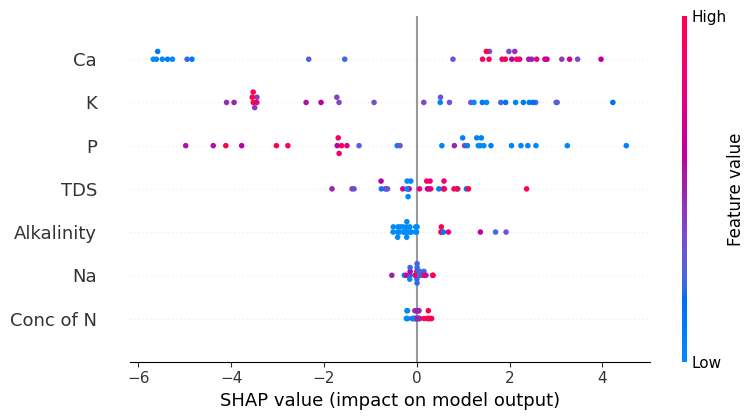

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

In [ ]:
# Create the SVR model
svr = SVR()  # 'rbf' stands for radial basis function, which allows for non-linear regression
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Train the model on the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error (MSE): 37.68
R-squared (R2): 0.43


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as per your requirement.

# Train the model on the training data
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 38.78
R-squared (R2): 0.41


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_Mg_df[['Conc of Mg','Na','CO_3','HCO_3','NO3_N','Hardness_ppm','TDS']], final_Mg_df[['water uptake']], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the Decision Tree Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 8.23
R-squared (R2): 0.81


In [ ]:
explainer = shap.Explainer(regressor)

# Calculate SHAP values for a single instance (e.g., the first row in the dataset)
shap_values = explainer.shap_values(X_train.iloc[0])

# The shap_values variable now contains the SHAP values for each feature for the first instance
print(shap_values)

[-0.23508362 -0.11659169 -0.1495133   0.03019655 -1.84803373  0.56838589
 -0.74432084]


In [ ]:
shap_values = explainer.shap_values(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


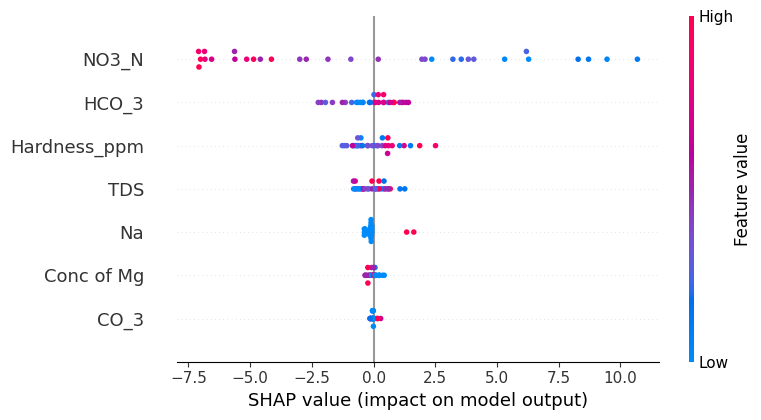

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

In [ ]:
# Create the SVR model
svr = SVR()  # 'rbf' stands for radial basis function, which allows for non-linear regression
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Train the model on the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error (MSE): 16.62
R-squared (R2): 0.62


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as per your requirement.

# Train the model on the training data
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 24.07
R-squared (R2): 0.45


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_K_df[['Conc of K','Ca','Na','SO_4','NO3_N','P','Alkalinity','TDS','Mn']], final_K_df[['water uptake']], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the Decision Tree Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 7.88
R-squared (R2): 0.74


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

In [ ]:
# Create the SVR model
svr = SVR()  # 'rbf' stands for radial basis function, which allows for non-linear regression
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Train the model on the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error (MSE): 3.83
R-squared (R2): 0.87


In [ ]:
# Define column names
column_names = ['Conc of K','Ca','Na','SO_4','NO3_N','P','Alkalinity','TDS','Mn']

X_train_scaled = pd.DataFrame(X_train_scaled, columns=column_names)

In [ ]:
X_train_scaled

,Conc of K,Ca,Na,SO_4,NO3_N,P,Alkalinity,TDS,Mn
0,0.124568,-0.803321,-0.679842,0.927740,-0.300900,0.231980,-0.736527,0.017626,-0.580573
1,0.124568,-0.751762,0.220803,-1.189240,-0.485459,-0.173140,-0.736527,-0.549062,2.419055
2,0.124568,-0.829101,0.220803,-0.581110,-0.818315,-0.173512,-0.736527,-0.624080,1.687088
3,-1.162637,1.052800,0.581062,0.841684,-0.157531,-1.052108,1.402718,-0.640300,-0.724096
4,0.124568,-0.790432,0.220803,-0.885175,-0.651887,-0.173326,-0.736527,-0.586571,2.053072
5,-1.162637,0.292306,-1.580487,-0.707326,2.125116,-0.584810,0.086260,0.134208,-0.580573
6,0.124568,-0.906439,0.220803,0.027020,-1.151172,-0.173883,-0.736527,-0.699098,0.955122
7,-1.162637,1.317040,0.400932,1.185908,-0.347810,-1.061601,1.567275,-0.673754,-0.777917
8,1.411773,0.537211,-0.859971,0.061442,0.005113,1.158490,-0.736527,0.896551,-0.429874
9,-1.162637,-1.061116,2.022094,-1.912111,1.364703,-0.976170,0.086260,-0.372669,-0.293527


  0%|          | 0/31 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


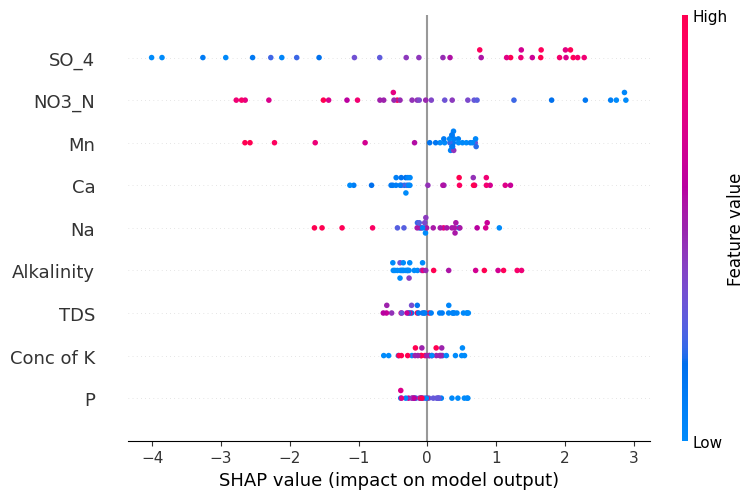

In [ ]:
# Create a SHAP explainer object using the SVR model's predict function
explainer = shap.KernelExplainer(grid_search.predict, X_train_scaled)

# Calculate SHAP values for all instances in the dataset
shap_values = explainer.shap_values(X_train_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_scaled)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as per your requirement.

# Train the model on the training data
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 4.71
R-squared (R2): 0.84
